<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Additional Bayesian statistics problems

_Authors: Matt Brems (DC), Richard Harris (CHI), Kiefer Katovich (SF)_

---


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Pregnancy screening

Imagine that I had a suspicion that someone was pregnant. We might use a pregnancy test to determine whether or not that's the case. Consider the following:

1. Our hypothesis, $H$, is that this person is pregnant.
2. A positive result on the pregnancy test is denoted $D$.
2. I have some information about the world:
  - $p(H) = 0.125$ -- in other words, on average, 12.5% of women are pregnant (not accurate, but useful for our purposes here)
  - $p(D) = 0.14$ -- 14% of people who take the pregnancy test come back with a positive result
  - $p(D|H) = 0.85$ -- the likelihood states "How likely would we get data that looks like this _if_ our hypothesis was true?" In other words, how accurate is our test?
  
**Estimate how likely a woman is to actually be pregnant who got a positive result on the test using Bayes Theorem.**

Answer:

$$ 
\begin{align}
p(H|D) &= \frac{p(D|H)p(H)}{p(D)} \\
p(H|D) &= \frac{0.85 \cdot 0.125}{0.14}\\
p(H|D) &= 0.759
\end{align}
$$

So, we've got a decent chance of being pregnant but not 100% -- that means that our posterior probability of somebody being pregnant ($H=1$) _given_ the data that we've seen (a positive result on the test) is 0.759%.

In [3]:
# in python:

def bayes(likelihood, prior, marginal):
    return (likelihood * prior) / float(marginal)

bayes(0.85, 0.125, 0.14)

# (This is one reason why we put people through multiple tests to confirm a diagnosis!)

0.7589285714285713

### 2. The Cookie Challenge

Imagine that we have two jars of cookies, each with their own ratio of cookies:

**Jar 1** (10 cookies)
- 50% chocolate
- 50% vanilla

**Jar 2** (40 cookies)
- 75% chocolate
- 25% vanilla

Answer the two questionss below:

**2.1 If I take out a vanilla cookie from a jar without telling you which jar, can you estimate the probability of which drawing from jar 2?**

**2.2 Suppose that we got 1 chocolate and then 1 vanilla cookie. We put each cookie back in the jar after we get it (sampling with replacement). What is the probability we drew from jar 2?**

2.1 Answer:

In this case, let's figure out what we know:

- We got a vanilla cookie. $p(D)$ will be the probability of getting a vanilla cookie in general.
- Let's assume that our hypothesis $H$ is that we're pulling from Jar 2 (because if we gain evidence for one hypothesis, we're also gaining evidence for the inverse of that hypothesis).
- $p(D) = 0.3$ -- we have 15 vanilla cookies out of a total of 50 cookies.
- $p(D|H) = 0.25$ -- _if we are actually pulling from jar 2_ then we would get have a 25% chance of pulling out a vanilla cookie anyway.
- $p(H) = 0.5$ -- the chance that it's actually Jar 2 that we're pulling from. We don't know any better right now, so we'll say that it's 50/50.

So what happens next?

In [6]:
bayes(0.25, 0.5, 0.3)
# We've got a 41% chance that we've pulled from Jar 2. 

0.4166666666666667

2.2 Answer:

So this starts to get a little unwieldly as we draw more cookies. If we have _multiple_ pieces of data, we can use the chain rule of probability.

- If we draw two cookies, we would end up applying Bayes theorem like this:

$$ p(H|D_1, D_2) = \frac{p(D_1, D_2, H)}{p(D_1, D_2)}$$

- This is easier to calculate if we use odds ratios, so it would become something like this:

$$ p(H|D_1, D_2) = \frac{p(D_2|D_1, H)}{p(D_2 | \lnot H, D_1)} \cdot \frac{p(D_1|H)}{p(D_1|\lnot H)} \cdot p(H)$$

($\lnot$ means not -- the inverse of that hypothesis)

- And if we fill in:

$$ p(H|D_1, D_2) = \frac{0.75}{0.5} \cdot \frac{0.25}{0.5} \cdot 0.5 = 0.375$$

Getting one cookie of each color gives us a likelihood of 0.375 that our hypothesis that we are pulling from Jar 2 is correct. Note that we are assuming here that our events are independent since we drew with replacement -- pulling from the jar doesn't change the distributions of cookies in it!

What happens if we introduced the cookies in a different order? So long as the events are independent, we should not see a difference!

### 3. German Tank Problem

A railroad numbers its railcars $1,\ldots,N$. You see a railcar with the number 60 painted on it. The problem is to come up with an estimate for $N$. We'll denote $N=\theta$ to stick with our standard notation.

Apply Bayesian analysis to this problem by articulating the hypothesis/hypotheses, the data, and the likelihood. Be sure to try at least three separate prior distributions for $\theta$. What effect does this have on your posterior distribution of $\theta$ and, thus, your estimate for $N$?

In [ ]:
## The hypotheses are:
## H_60: N = 60.
## H_61: N = 61.
## H_62: N = 62.
## ...
## H_1000: N = 1,000. (I arbitrarily stop here, but we could add more hypotheses.)

## The data is: we observed railcar 60.

## The likelihood P(y=60|H) = 1/N. (We assume a Uniform distribution here. It is certainly possible
## to assume a different form of the likelihood - but Uniform(0,N) seems to make the most sense here.)
## For example, P(y=60|H_60) = 1/60; P(y=60|H_61) = 1/61; and so on.

In [13]:
# Start of by defining a prior. I will hypothesize that 1 thru 100 trains are equally possible.
# All other train numbers are impossible in my prior!

prior = np.zeros(120)
prior[1:101] = 1./100.
print np.sum(prior)
print prior

1.0
[ 0.    0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01
  0.01  0.01  0.01  0.01  0.01  0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]


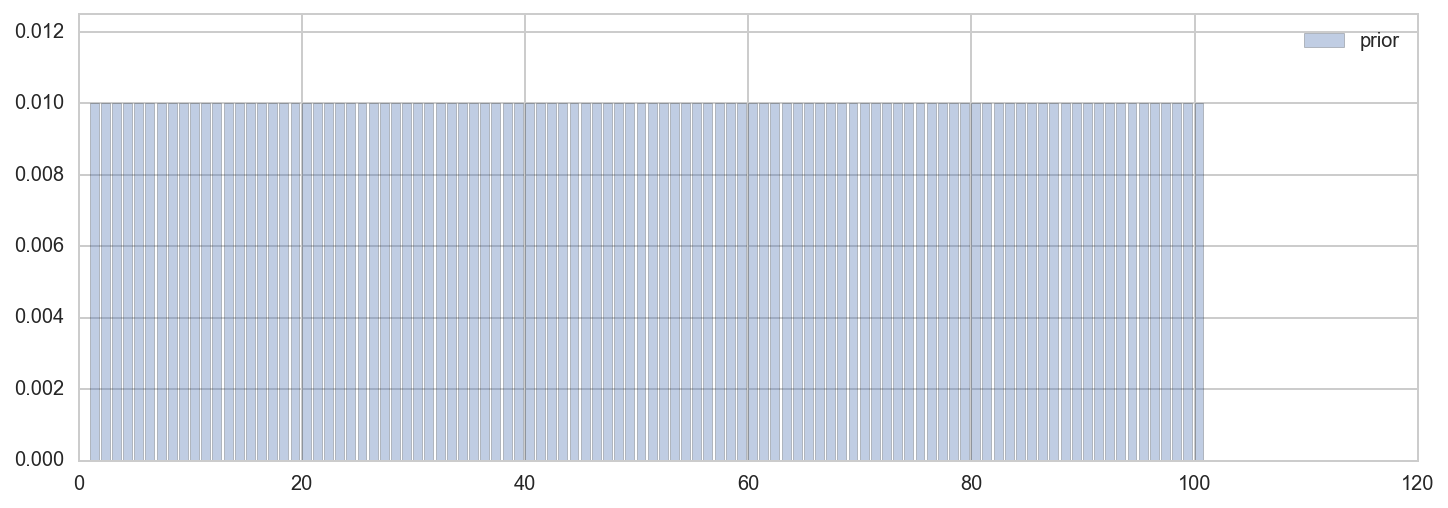

In [14]:
# Plot out this "uniform" prior to show what it looks like. This is a proper prior
# in that the area sums to 1 (probability).
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(np.arange(len(prior)), prior, alpha=0.35, label='prior')
ax.legend(loc='upper right')
ax.set_ylim([0, np.max(prior)+np.max(prior)*0.25])
plt.show()

We can write out the formula for this.

### $$ P(\text{total trains} = N \;|\; \text{observed} = x) = \frac{P(\text{observed} = x \;|\; \text{total trains} = N)}{P(\text{observed} = x)} P(\text{total trains} = N) $$

In [15]:
# We have the prior, P(total trains = N). We believe that the total number of trains 
# can only be between 1 and 100 and that any of those are equally likely.

# We can write out now a function for the likelihood, P(observed = x | total trains = N).
# This will take three arguments: which train number was observed and how many trains
# there are (the conditional part total trains = N)
def likelihood(observed, total_trains):
    if observed > total_trains:
        return 0.0
    else:
        return 1./total_trains


In [16]:
# Iterate over all of our hypotheses and calculate the likelihood. Because this is a discrete
# problem we can plug in each of our train numbers that we have a prior for to get out
# the corresponding likelihood. 

# The problem states we have observed train #60:
observed = 60
likes = np.array([likelihood(observed, x) for x in range(len(prior))])
print likes

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.01666667  0.01639344
  0.01612903  0.01587302  0.015625    0.01538462  0.01515152  0.01492537
  0.01470588  0.01449275  0.01428571  0.01408451  0.01388889  0.01369863
  0.01351351  0.01333333  0.01315789  0.01298701  0.01282051  0.01265823
  0.0125      0.01234568  0.01219512  0.01204819  0.01190476  0.01176471
  0.01162791  0.011

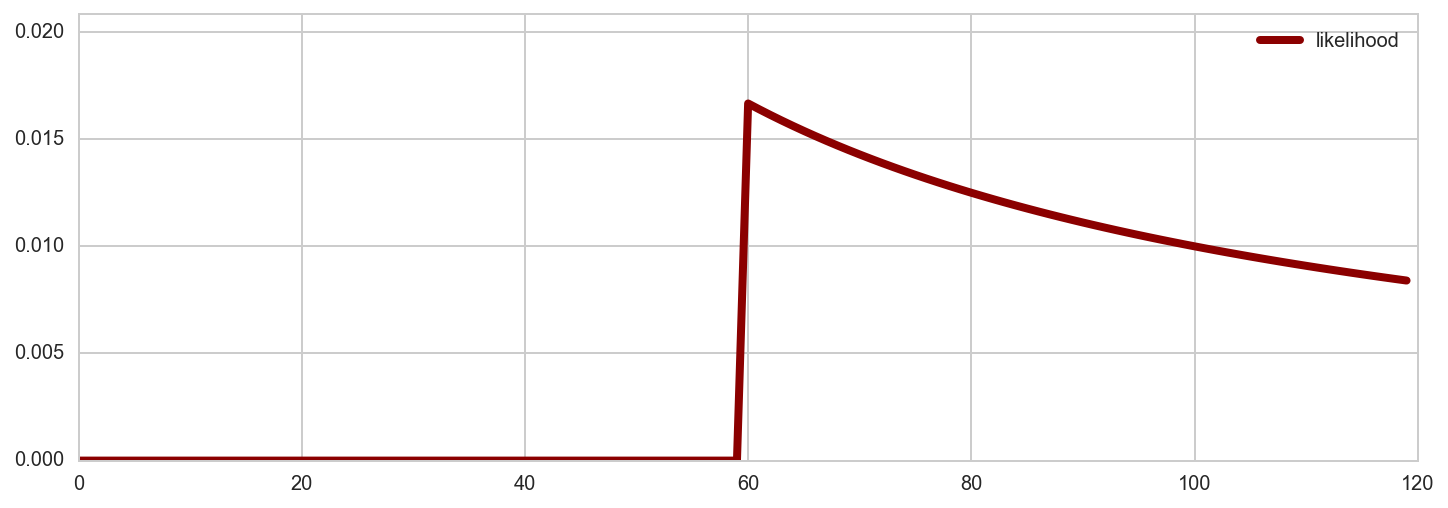

In [20]:
# We can plot out these likelihoods before multiplying them by the prior.
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(np.arange(len(likes)), likes, lw=4, color='darkred', label='likelihood')
ax.legend(loc='upper right')
ax.set_ylim([0, np.max(likes)+np.max(likes)*0.25])
plt.show()

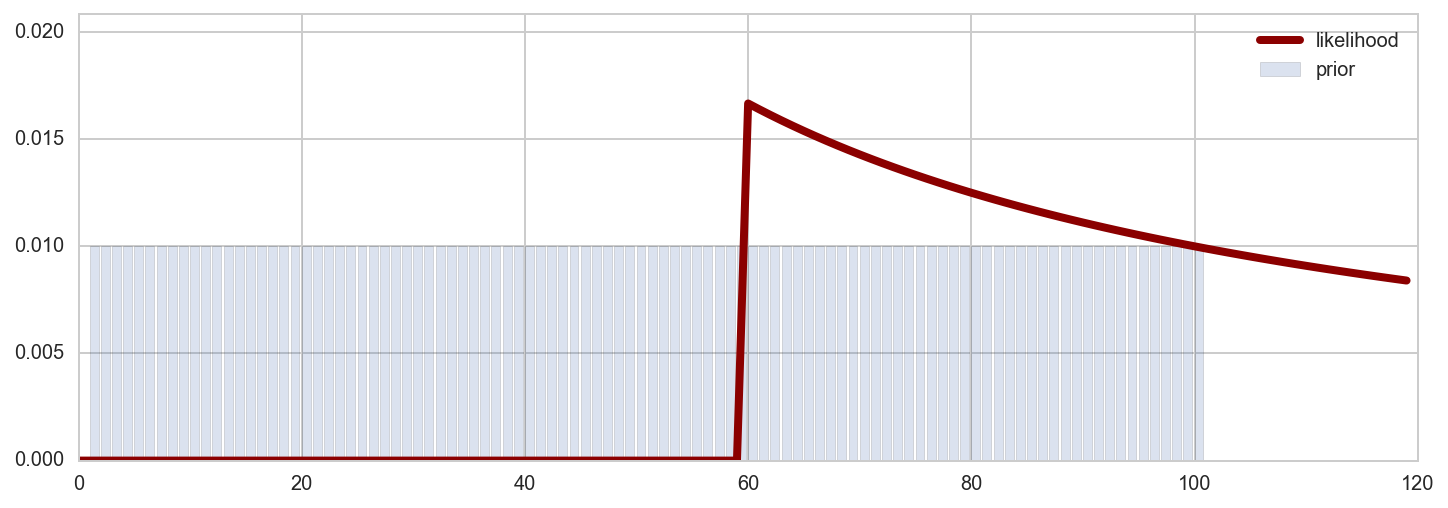

In [22]:
# We can also show this plotted WITH the prior - you can see that our prior belief
# is only valid for a part of that range of likelihoods.
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(np.arange(len(prior)), prior, alpha=0.2, label='prior')
ax.plot(np.arange(len(likes)), likes, lw=4, color='darkred', label='likelihood')
ax.legend(loc='upper right')
ax.set_ylim([0, np.max(likes)+np.max(likes)*0.25])
plt.show()

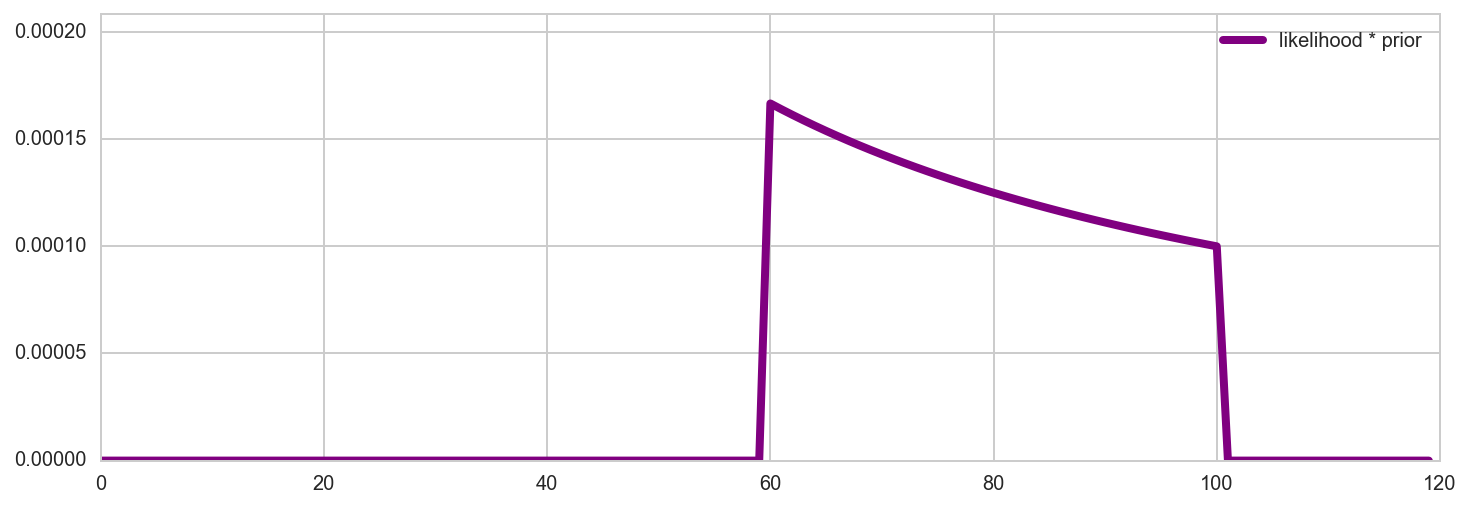

In [23]:
# We will multiply the prior by the likelihood at this point to get our likelihood
# adjusted by our prior belief.
like_prior = np.array([lk*pr for lk, pr in zip(likes, prior)])

# and then we can plot these new updated values:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(np.arange(len(like_prior)), like_prior, lw=4, color='purple', label='likelihood * prior')
ax.legend(loc='upper right')
ax.set_ylim([0, np.max(like_prior)+np.max(like_prior)*0.25])
plt.show()

In [24]:
# You can see these values are tiny - and they don't sum to 1...
print np.sum(like_prior)

0.00524173771355


In [ ]:
# This is where the denominator - the marginal probability of observing train 60
# comes into play. It will normalize this distribution so that the values sum to 1
# and form a proper probability distribution.

# In the Monty Hall problem, we could have calculated the denominator (the marginal 
# probability that Monty opens door B) as:
# P(opened = B) = P(opened=B|win=A)P(win=A) + P(opened=B|win=B)P(win=B) + P(opened=B|win=C)P(win=C)

# In order to find the marginal probability we sum the probabilities across all our hypotheses.
# This is from the law of total probability.

We can write out the marginal probability of observing train 60 with the law of total probability formula.

### $$ P(\text{observed} = 60) = \sum_{i=1}^{100} P(\text{observed} = 60 \cap \text{total trains} = i) $$

Which can be re-written as:

### $$ P(\text{observed} = 60) = \sum_{i=1}^{100} P(\text{observed} = 60 \;|\; \text{total trains} = i)P(\text{total_trains} = i) $$

In [ ]:
# So the denominator here, our marginal probability of observing train 60, is the sum
# of our likelihoods times priors for all hypotheses about the train.

# If we think about this from a purely numerical standpoint - this has to be the case because
# in order for all of our likelihood*prior values to sum to 1. and form a proper probability 
# distribution, we will need to divide them by their sum.

In [26]:
posteriors = np.array([lp/np.sum(like_prior) for lp in like_prior])
print np.sum(posteriors)

1.0


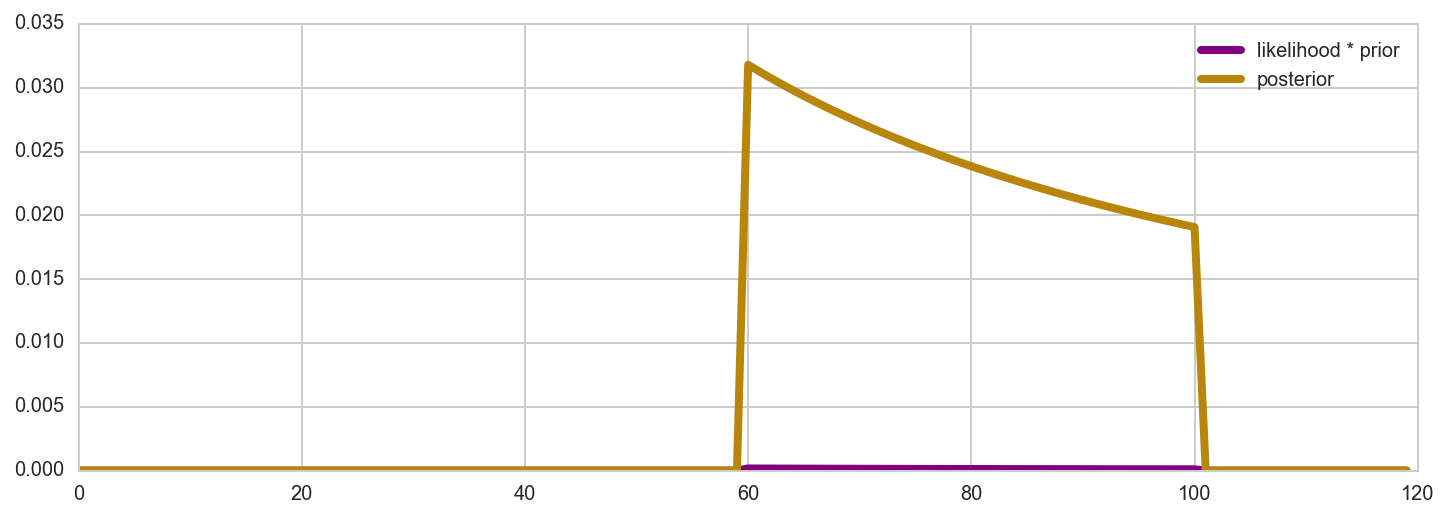

In [29]:
# If we plot this, we can see that the shape of the distribution has not changed. All we
# have done is adjust the scale so that we have probabilities in our posterior rather 
# than just likelihoods.

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(np.arange(len(like_prior)), like_prior, lw=4, color='purple', label='likelihood * prior')
ax.plot(np.arange(len(posteriors)), posteriors, lw=4, color='darkgoldenrod', label='posterior')
ax.legend(loc='upper right')
ax.set_ylim([0, np.max(posteriors)+np.max(posteriors)*0.1])
plt.show()

### 4. Dungeons & Dragons Dice Problem #1

There are five dice: a 4-sided die, 6-sided die, 8-sided die, 12-sided die, 20-sided die. You roll a 6. The problem is to predict which die was thrown.

Apply Bayesian analysis to this problem by articulating the hypothesis/hypotheses, the data, and the likelihood. Identify which die you believe to be the thrown die and how likely this is to be the thrown die.

In [ ]:
## The hypotheses are:
## H_4: 4-sided die.
## H_6: 6-sided die.
## H_8: 8-sided die.
## H_12: 12-sided die.
## H_20: 20-sided die.

## The data is: we rolled a 6.

$$ P(H_4|y=6) \propto P(y=6|H_4)P(H_4) = 0 \times \frac{1}{5} = 0$$
$$ P(H_6|y=6) \propto P(y=6|H_6)P(H_6) = \frac{1}{6} \times \frac{1}{5} = \frac{1}{30}$$
$$ P(H_8|y=6) \propto P(y=6|H_8)P(H_8) = \frac{1}{8} \times \frac{1}{5} = \frac{1}{40}$$
$$ P(H_{12}|y=6) \propto P(y=6|H_{12})P(H_{12}) = \frac{1}{12} \times \frac{1}{5} = \frac{1}{60}$$
$$ P(H_{20}|y=6) \propto P(y=6|H_{20})P(H_{20}) = \frac{1}{20} \times \frac{1}{5} = \frac{1}{100}$$


In [ ]:
## Note that, since we scale all probabilities by the same amount,
## this is not currently a valid probability distribution but our
## results are correct up to a constant of proportionality.

## It is clear that the likeliest die thrown is the 6-sided die,
## but just how likely is it?

## 1/30 / (1/30 + 1/40 + 1/60 + 1/100) is roughly 39.2%.
## 1/40 / (1/30 + 1/40 + 1/60 + 1/100) is roughly 29.4%.
## 1/60 / (1/30 + 1/40 + 1/60 + 1/100) is roughly 19.6%.
## 1/100 / (1/30 + 1/40 + 1/60 + 1/100) is roughly 11.8%.

## There's roughly a four in ten chance that the die we threw was
## the 6-sided die.

### 5. Dungeons & Dragons Dice Problem #2

There are five dice: a 4-sided die, 6-sided die, 8-sided die, 12-sided die, 20-sided die. You roll the same die and get a 6, 4, 8, 7, 5, 7. The problem is to predict which die was thrown.

Apply Bayesian analysis to this problem by articulating the hypothesis/hypotheses, the data, and the likelihood. Identify which die you believe to be the thrown die and how likely this is to be the thrown die.

In [ ]:
## The hypotheses are:
## H_4: 4-sided die.
## H_6: 6-sided die.
## H_8: 8-sided die.
## H_12: 12-sided die.
## H_20: 20-sided die.

## The data is: we rolled a 6, 4, 8, 7, 5, 7.

$$ P(H_4|data) \propto P(data|H_4)P(H_4) = 0 \times \frac{1}{5} = 0$$
$$ P(H_6|data) \propto P(data|H_6)P(H_6) = 0 \times \frac{1}{5} = 0$$
$$ P(H_8|data) \propto P(data|H_8)P(H_8) = \left(\frac{1}{8}\right)^6 \times \frac{1}{5} = \frac{1}{1,310,720}$$
$$ P(H_{12}|data) \propto P(data|H_{12})P(H_{12}) = \left(\frac{1}{12}\right)^6 \times \frac{1}{5} = \frac{1}{14,929,920}$$
$$ P(H_{20}|data) \propto P(data|H_{20})P(H_{20}) = \left(\frac{1}{20}\right)^6 \times \frac{1}{5} = \frac{1}{320,000,000}$$


In [ ]:
## Note that, since we scale all probabilities by the same amount,
## this is not currently a valid probability distribution but our
## results are correct up to a constant of proportionality.

## It is clear that the likeliest die thrown is now the 8-sided die,
## but just how likely is it?

## 1/1310720 / (1/1310720 + 1/14929920 + 1/320000000) is roughly 91.6%.
## 1/14929920 / (1/1310720 + 1/14929920 + 1/320000000) is roughly 8.0%.
## 1/320000000 / (1/1310720 + 1/14929920 + 1/320000000) is roughly 0.4%.

## There's roughly a nine in ten chance that the die we threw was
## the 8-sided die.

### 6. M&M Problem

You have two bags of M&Ms. The first bag, created before 1995, has the following color distribution: 30% brown, 20% yellow, 20% red, 10% orange, 10% green, 10% tan. The second bag, created after 1995, has the following color distribution: 24% blue, 20% green, 16% orange, 14% yellow, 12% red, 12% brown.

From one bag, you pull a yellow M&M. The problem is to predict from which bag you pulled the yellow M&M.

Apply Bayesian analysis to this problem by articulating the hypothesis/hypotheses, the data, the likelihood.

Consider the yellow M&M already pulled (so this is part of your data). From the other bag, you pull a green M&M. Update your posterior appropriately and update your answer to the problem.

In [ ]:
## The hypotheses are:
## H_1: Bag 1 is the "pre-1995 bag" and Bag 2 is the "post-1995 bag."
## H_2: Bag 1 is the "post-1995 bag" and Bag 2 is the "pre-1995 bag."

## The data is: we pulled a yellow M&M from Bag 1.

$$ P(H_1|\text{yellow from }B_1) \propto P(\text{yellow from }B_1|H_1)P(H_1) = \frac{1}{5} \times \frac{1}{2} = \frac{1}{10}$$
$$ P(H_2|\text{yellow from }B_1) \propto P(\text{yellow from }B_1|H_2)P(H_2) = \frac{14}{100} \times \frac{1}{2} = \frac{7}{100}$$

In [ ]:
## Note that, since we scale all probabilities by the same amount,
## this is not currently a valid probability distribution but our
## results are correct up to a constant of proportionality.

## It is clear that it's currently likelier that H_1 is true, indicating
## Bag 1 is the pre-1995 bag - but just how likely is it?

## 1/10 / (1/10 + 7/100) is roughly 58.8%.
## 7/100 / (1/10 + 7/100) is roughly 41.2%.
## There's roughly a three in five chance that Bag 1 is the pre-1995
## bag.

In [ ]:
## Now let's consider the new piece of information. We now know that
## we pull a green M&M from Bag 2. Note that our old posterior is
## our new prior.

## The hypotheses are still:
## H_1: Bag 1 is the "pre-1995 bag" and Bag 2 is the "post-1995 bag."
## H_2: Bag 1 is the "post-1995 bag" and Bag 2 is the "pre-1995 bag."

## The data is: we pulled a green M&M from Bag 2.

$$ P(H_1|\text{G from }B_2,\text{Y from }B_1) \propto P(\text{G from }B_2|H_1,\text{Y from }B_1)P(H_1|\text{Y from }B_1) = \frac{1}{5} \times \frac{1}{10} = \frac{1}{50}$$
$$ P(H_2|\text{G from }B_2,\text{Y from }B_1) \propto P(\text{G from }B_2|H_2,\text{Y from }B_1)P(H_2|\text{Y from }B_1) = \frac{1}{10} \times \frac{7}{100} = \frac{7}{1000}$$

In [ ]:
## Note that, since we scale all probabilities by the same amount,
## this is not currently a valid probability distribution but our
## results are correct up to a constant of proportionality.

## It is clear that it's currently likelier that H_1 is true, indicating
## Bag 1 is the pre-1995 bag - but just how likely is it?

## 1/50 / (1/50 + 7/1000) is roughly 74.1%.
## 7/1000 / (1/50 + 7/1000) is roughly 25.9%.
## There's roughly a three in four chance that Bag 1 is the pre-1995
## bag.